In [3]:
#Copy paste API key and Password from paper trading account


In [91]:
!pip install backtrader
!pip install alpaca-py
!pip install alpaca-trade-api
!pip install ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 7.7 MB/s eta 0:00:00a 0:00:01


In [35]:
from alpaca.trading.client import TradingClient
from alpaca.trading.enums import OrderSide, TimeInForce
from alpaca.trading.stream import TradingStream
from alpaca.trading.requests import MarketOrderRequest
import matplotlib as plt
from datetime import datetime

client = TradingClient(API, password,paper = True)

In [9]:
import requests
import asyncio
import alpaca_trade_api as tradeapi
from alpaca.data.timeframe import TimeFrame

In [11]:
symbol = 'PLTR'
start_date = datetime(2020,1,1)
end_date = datetime(2024,9,20)

In [13]:
from alpaca.data import StockHistoricalDataClient
from alpaca.data.requests import StockLatestQuoteRequest
from alpaca.data.requests import StockBarsRequest

client = StockHistoricalDataClient(API,password)

In [15]:
params = StockBarsRequest(symbol_or_symbols= symbol,
                                timeframe = TimeFrame.Day,
                                start = start_date,
                                end = end_date)
uncleaned_list = client.get_stock_bars(params)

In [95]:
uncleaned_list

{   'data': {   'PLTR': [   {   'close': 9.5,
                                'high': 11.42,
                                'low': 9.11,
                                'open': 10.0,
                                'symbol': 'PLTR',
                                'timestamp': datetime.datetime(2020, 9, 30, 4, 0, tzinfo=TzInfo(UTC)),
                                'trade_count': 811863.0,
                                'volume': 339225417.0,
                                'vwap': 10.319702},
                            {   'close': 9.46,
                                'high': 10.1,
                                'low': 9.23,
                                'open': 9.69,
                                'symbol': 'PLTR',
                                'timestamp': datetime.datetime(2020, 10, 1, 4, 0, tzinfo=TzInfo(UTC)),
                                'trade_count': 390407.0,
                                'volume': 124769756.0,
                                'vwap': 9.5882},
 

In [101]:
#For easy data filteration and cleaning we convert the dict -> cleaned dict
cleaned_list = []
for row in uncleaned_list[symbol]:
    cleaned_list.append({'date': row.timestamp,'high' : row.close, 'low' : row.low,'open': row.open,'close': row.close, 'volume': row.volume})

In [103]:
import pandas as pd

df = pd.DataFrame(cleaned_list)

In [77]:
#Create a dummy strategy:

class TestStrategy(bt.Strategy):
    def __init(self):
        self.dataclose = self.df[0].close
    def log(self, txt, dt = None):
        #Logs funciton call
        dt = dt or self.df[0].datetime.date(0)
        print(dt,txt)
    def next(self):
        #Log close price
        self.log('Close  : ',self.dataclose[0])

In [79]:
# #Got the required data. Now insert it to bracktrader
# import backtrader as bt

# #Create cerebro engine 
# cerebro=bt.Cerebro()

# #adding data to Cerebro
# feed = bt.feeds.PandasData(dataname = df)

# cerebro.adddata(feed)

# cerebro.addstrategy(TestStrategy)

In [81]:
# cerebro.broker.setcash(100000)
# print('Start Portfolio Value : ', cerebro.broker.getvalue())

# cerebro.run()

In [105]:
df

,date,high,low,open,close,volume
0,2020-09-30 04:00:00+00:00,9.50,9.1100,10.00,9.50,339225417.0
1,2020-10-01 04:00:00+00:00,9.46,9.2300,9.69,9.46,124769756.0
2,2020-10-02 04:00:00+00:00,9.20,8.9400,9.06,9.20,54943429.0
3,2020-10-05 04:00:00+00:00,9.03,8.9200,9.41,9.03,36430017.0
4,2020-10-06 04:00:00+00:00,9.90,8.9000,9.04,9.90,104844762.0
...,...,...,...,...,...,...
994,2024-09-13 04:00:00+00:00,35.59,34.8900,34.97,35.59,49727172.0
995,2024-09-16 04:00:00+00:00,36.31,35.5600,35.78,36.31,74767329.0
996,2024-09-17 04:00:00+00:00,36.45,35.8700,37.00,36.45,64461751.0
997,2024-09-18 04:00:00+00:00,36.38,35.8712,35.90,36.38,66279770.0


In [107]:
df_parsed = bt.feeds.PandasData(dataname = df, datetime = 0, high = 1, low = 2, open = 3, close = 4, volume=5)

In [109]:
cerebro = bt.Cerebro()
cerebro.adddata(df_parsed)

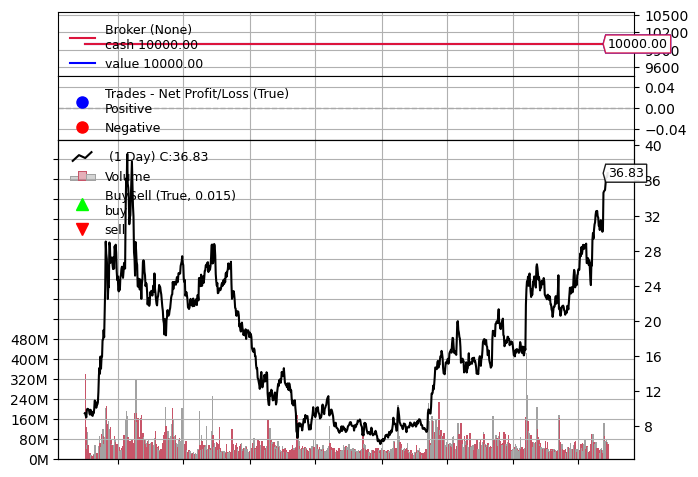

[[<Figure size 640x480 with 4 Axes>]]

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming your cerebro instance is already set up
cerebro.run()
cerebro.plot(iplot=False)  # Disable interactive plotting